In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
dataset = pd.read_csv("C:/Users/VISHU/3D Objects/Machine Learning/Datasets/payment_fraud.csv")
dataset.shape

(39221, 6)

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [102]:
dataset['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [103]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class PaymentMethod(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        cols = ['paypal', 'storecredit', 'creditcard']
        Encode = OneHotEncoder()
        matrix = Encode.fit_transform(X[['paymentMethod']]).toarray()
        for i in range(len(matrix.T)):
            X[cols[i]] = matrix.T[i]
        X = X.drop(['paymentMethod'], axis=1)
        return X

In [104]:
from sklearn.preprocessing import MinMaxScaler
class FeatureScaling(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        minmax = MinMaxScaler()
        X['accountAgeDays'] = minmax.fit_transform(X[['accountAgeDays']])
        X['localTime'] = minmax.fit_transform(X[['localTime']])
        X['paymentMethodAgeDays'] = minmax.fit_transform(X[['paymentMethodAgeDays']])
        return X

In [105]:
from sklearn.pipeline import Pipeline
Pipe = Pipeline([
    ("Payment", PaymentMethod()),
    ("Features", FeatureScaling())
])
dataset = Pipe.fit_transform(dataset)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  float64
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethodAgeDays  39221 non-null  float64
 4   label                 39221 non-null  int64  
 5   paypal                39221 non-null  float64
 6   storecredit           39221 non-null  float64
 7   creditcard            39221 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.4 MB


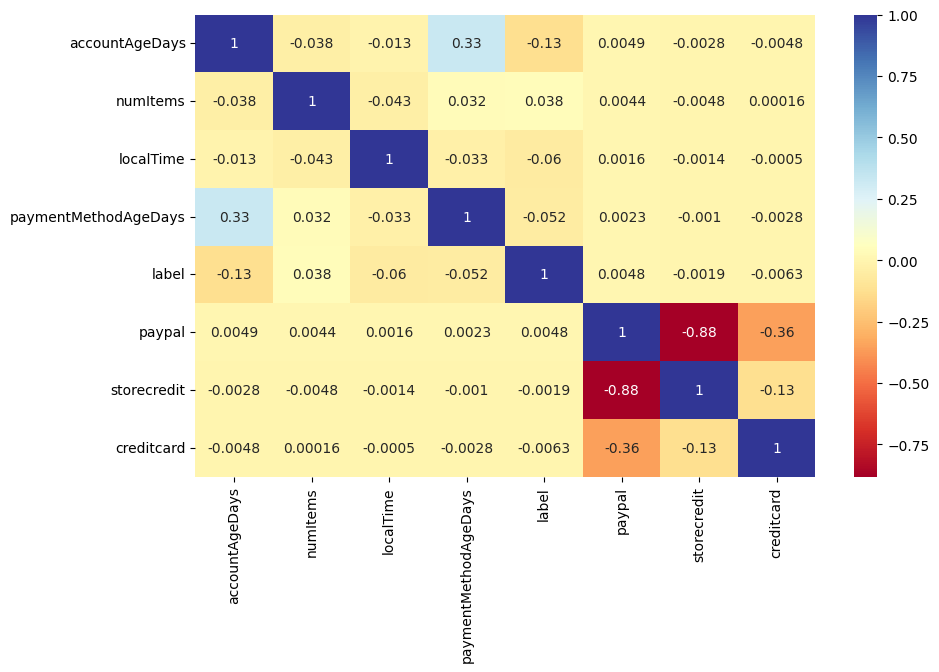

In [106]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), cmap="RdYlBu", annot=True)
plt.show()

In [107]:
dataset.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paypal,storecredit,creditcard
0,0.014007,1,0.936029,0.014105,0,0.0,1.0,0.0
1,0.362181,1,0.935358,0.000000,0,0.0,0.0,1.0
2,0.422211,1,0.974109,0.000000,0,1.0,0.0,0.0
3,0.251126,1,0.966602,0.000000,0,1.0,0.0,0.0
4,1.000000,1,1.000000,0.000000,0,1.0,0.0,0.0


In [108]:
X = dataset.drop(['label'], axis=1)
Y = dataset[['label']]

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()
scores = []
fold = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(Logistic, X, Y.values.ravel(), cv=fold)
for i in range(0, 10):
    print("The Accuracy Score of ",(i+1)," fold is : ",scores[i]*100,"%")

The Accuracy Score of  1  fold is :  98.41957685444814 %
The Accuracy Score of  2  fold is :  98.5721570627231 %
The Accuracy Score of  3  fold is :  98.62315145334013 %
The Accuracy Score of  4  fold is :  98.62315145334013 %
The Accuracy Score of  5  fold is :  98.67414584395716 %
The Accuracy Score of  6  fold is :  98.29168791432943 %
The Accuracy Score of  7  fold is :  98.47016828148904 %
The Accuracy Score of  8  fold is :  98.52116267210607 %
The Accuracy Score of  9  fold is :  98.62315145334013 %
The Accuracy Score of  10  fold is :  98.82712901580825 %
